In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import math
import itertools as itt
import sys
from collections import deque
import pickle

In [2]:
data= np.loadtxt('C:/Users/Devanshu/Desktop/Project_action/Beef/Beef_TRAIN', delimiter=',')
print(data.shape)

(30, 471)


In [3]:
series_1= data[:,0]
series_2= data[:,9]
series_3= data[:,19]
series_4= data[:,29]

print(series_2)

[-0.32653   -0.022588  -0.11648   -0.0076778 -0.025281  -0.46953
 -0.26314   -0.24559   -0.25265   -0.15168   -0.17298   -0.27203
 -0.31109   -0.22687   -0.18673   -0.20586   -0.15795   -0.30298
 -0.11456   -0.1459    -0.028315   0.021681   0.20591    0.0008072
 -0.26597   -0.24758   -0.22208   -0.16319   -0.20547   -0.27315  ]


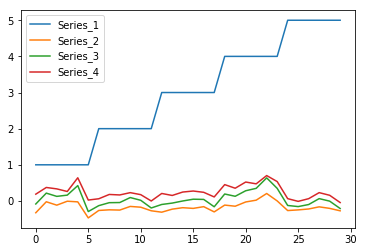

In [4]:
plt.plot(series_1)
plt.plot(series_2)
plt.plot(series_3)
plt.plot(series_4)
plt.legend(('Series_1', 'Series_2', 'Series_3','Series_4'))

plt.show()

In [35]:
def _window_maker(data, window_size):
    
    _window_maker.collect_query=[]
    _window_maker.collect_subsequence=[]
    _window_maker.collect_values=[]
    
    
    if len(data)% window_size != 0 :
        print('window_size is not good to divide data into equal subsequence')
    else:
        if len(data)/ window_size <= 4:
            print('select another window')
        else:
            
            for i in range(0,len(data)):
                
                query= data[i:i+window_size]
                #query_col=([i,query])
                #_window_maker.collect_query.append(query_col)
                #print('Query',query)
                
                if len(query)!= window_size :
                    return
                    #print('discarded')
                else:
                    query_col=([i,query])
                    _window_maker.collect_query.append(query_col)
                    for j in range(0,len(data),1):
                        subsequence= data[j:j+window_size]
                        #print('Subsequence',subsequence)
                        
                        if len(subsequence) != window_size :
                            #print('discarded')
                            break
                        else:
                            #print('Subsequence',subsequence)
                            collect_subseq= ([j,subsequence])
                            _window_maker.collect_subsequence.append(collect_subseq)
                            distance_value= dist= np.linalg.norm(query-subsequence)
                            collect_all_values= ([i,j,distance_value])
                            _window_maker.collect_values.append(collect_all_values)
                            #print('Query',query,'Subsequence',subsequence,'distance_value',distance_value)
                            
    
_window_maker(series_2,5)  #input to function is time series and window size user defined.

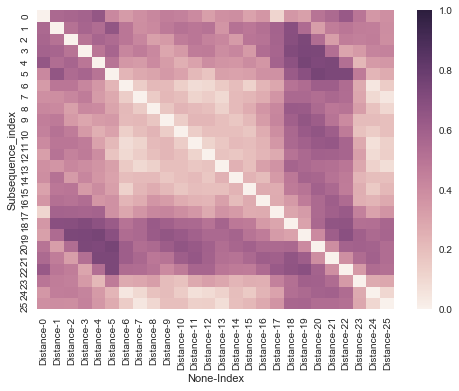

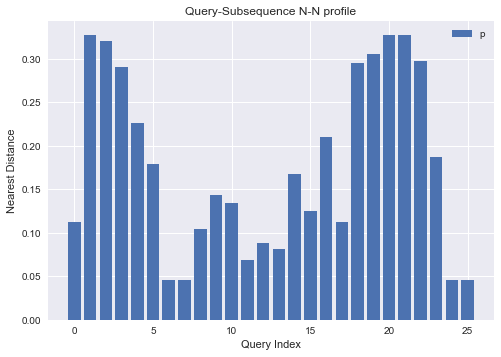

In [34]:
def matrix_visual(val,val1,val2):
    visual_df= pd.DataFrame(val,columns=['Index','Subsequence_index','Distance'])
    visual_df2=pd.DataFrame(val1,columns=['Index','Query'])
    visual_df3=pd.DataFrame(val2,columns=['Index','Subsequence'])
    
    visual_df1 = visual_df.drop(visual_df[visual_df.Distance <= 0].index)   #removing trivial matches i.e same query and subsequenc have distance of zero
    
    
    mini_for_each= pd.DataFrame(visual_df1.groupby(['Index'])['Distance'].min().round(5).reset_index())
    
    #Matrix_profile representation in pivot_table
    matrix_table= pd.pivot_table(visual_df, values=['Distance'],index='Subsequence_index',columns=(['Index']))

    # Visualization in heat map
    
    import seaborn as sns; sns.set() #heat map library import
    ax = sns.heatmap(matrix_table,vmin=0, vmax=1) #heat map for Index vs Subsequence_index with values in distance.
    plt.show()
    
    # Visualization of each query to its nearest distance in bar graph.
    
    plt.bar(mini_for_each.Index,mini_for_each.Distance)
    plt.xlabel('Query Index')
    plt.ylabel('Nearest Distance')
    plt.title('Query-Subsequence N-N profile')
    plt.legend(('profiling_series'))
    plt.show()
        
matrix_visual(_window_maker.collect_values,_window_maker.collect_query,_window_maker.collect_subsequence)

In [ ]:
# Nearest neighbour join 

In [7]:
'''def _window_maker(data, window_size):
    
    _window_maker.collect_query=[]
    _window_maker.collect_subsequence=[]
    
    
    
    if len(data)% window_size != 0 :
        print('window_size is not good to divide data into equal subsequence')
    else:
        if len(data)/ window_size <= 4:
            print('select another window')
        else:
            
            for i in range(0,len(data)):
                
                query= data[i:i+window_size]
                #print('Query',query)
                
                if len(query)!= window_size :
                    return
                    #print('discarded')
                else:
                    for j in range(i+window_size,len(data),1):
                        subsequence= data[j:j+window_size]
                        #print('Subsequence',subsequence)
                        
                        if len(subsequence) != window_size :
                            print('discarded')
                        else:
                            #print('Subsequence',subsequence)
                            
                            distance_value= dist= np.linalg.norm(query-subsequence)
                            print('Query',query,'Subsequence',subsequence,'distance_value',distance_value)
            
            
            
            
            
            
            
    
_window_maker(series_2,5)'''

"def _window_maker(data, window_size):\n    \n    _window_maker.collect_query=[]\n    _window_maker.collect_subsequence=[]\n    \n    \n    \n    if len(data)% window_size != 0 :\n        print('window_size is not good to divide data into equal subsequence')\n    else:\n        if len(data)/ window_size <= 4:\n            print('select another window')\n        else:\n            \n            for i in range(0,len(data)):\n                \n                query= data[i:i+window_size]\n                #print('Query',query)\n                \n                if len(query)!= window_size :\n                    return\n                    #print('discarded')\n                else:\n                    for j in range(i+window_size,len(data),1):\n                        subsequence= data[j:j+window_size]\n                        #print('Subsequence',subsequence)\n                        \n                        if len(subsequence) != window_size :\n                            print('discard